# Домашнее задание по теме "Дисперсионный анализ"

In [98]:
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import numpy as np
import pandas as pd  # для работы с таблицами
import seaborn as sns  # Более продвинутая библиотека для визуализации
from scipy import stats  # При работе со статистикой

## Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

<div class="alert alert-info">
    
### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [99]:
np.random.seed(11)
A_01 = stats.norm.rvs(scale=30, loc=11, size=100)
B_01 = A_01 + stats.norm.rvs(scale=54, loc=11, size=100)
a_01 = 0.05
H0_01 = "эффект препаратов различен"

# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_01 = stats.ttest_ind(A_01, B_01)
t, p_value_01

if p_value_01 >= a_01:
    print(f"Гипотеза {H0_01=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_01=} отклонена")
print(f"{p_value_01=:.3f}")

Гипотеза H0_01='эффект препаратов различен' не может быть отклонена
p_value_01=0.085


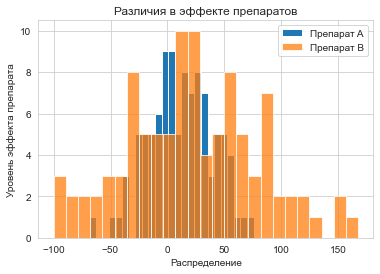

In [100]:
plt.hist(A_01, bins=25)
plt.hist(B_01, bins=25, alpha=0.75)
plt.title("Различия в эффекте препаратов")
plt.xlabel("Распределение")
plt.ylabel("Уровень эффекта препарата")
plt.legend(["Препарат A", "Препарат B"])

<div class="alert alert-info">
    
### Задание № 2
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [101]:
np.random.seed(11)
A_02 = stats.norm.rvs(scale=30, loc=11, size=100)
B_02 = A_02 + stats.norm.rvs(scale=54, loc=11, size=100)
a_02 = 0.05
H0_02 = "эффект препаратов различен"

# проверю, отличаются ли два зависимых образца с помощью парного t-критерия Стьюдента
t, p_value_02 = stats.ttest_rel(A_02, B_02)
t, p_value_02

if p_value_02 >= a_02:
    print(f"Гипотеза {H0_02=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_02=} отклонена")
print(f"{p_value_02=:.3f}")

Гипотеза H0_02='эффект препаратов различен' отклонена
p_value_02=0.032


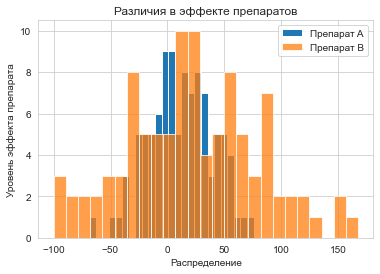

In [102]:
plt.hist(A_02, bins=25)
plt.hist(B_02, bins=25, alpha=0.75)
plt.title("Различия в эффекте препаратов")
plt.xlabel("Распределение")
plt.ylabel("Уровень эффекта препарата")
plt.legend(["Препарат A", "Препарат B"])

<div class="alert alert-info">
    
### Задание № 3
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [103]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 13.073701842546066


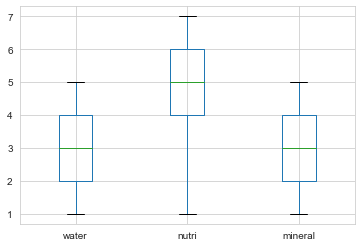

In [104]:
data = pd.DataFrame({"water": water, "nutri": nutri, "mineral": mineral})
data.boxplot()
print("Нулевая гипотеза:", "=".join(data))
print("Альтернативная гипотеза:", f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean) ** 2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(
    data[group].size * (group_mean - grand_mean) ** 2
    for group, group_mean in data.mean().items()
)
# отклонения значений внутри группы от средней группы
ssw = sum(
    sum((x - group_mean) ** 2 for x in data[group])
    for group, group_mean in data.mean().items()
)

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb / dfb
# внутригрупповой средний квадрат
mssw = ssw / dfw

f_value = mssb / mssw

p = stats.f.sf(f_value, dfb, dfw)
print("Результат:")
if p < 0.05:
    print("отклоняем нулевую гипотезу")
else:
    print("НЕ отклоняем нулевую гипотезу")
print(f"Полученное f-значение {f_value}")

## Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 


### Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [105]:
pokemon = pd.read_csv("pokemon.csv", error_bad_lines=False)  # Откроем датасет
# переименую столбцы в один формат
pokemon = pokemon.rename(
    columns={
        "pid": "Pid",
        "Class 1": "Class_1",
        "Class 2": "Class_2",
        "Sp. Atk": "Sp_Atk",
        "Sp. Def": "Sp_Def",
    }
)
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_19576\2679506828.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет


,Pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [106]:
# переименую NaN значения в 0
pokemon = pokemon.fillna(0)

### Задачи

<div class="alert alert-info">
    
#### Задание № 1
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [107]:
# гипотеза Н0
H0_01 = "все покемоны обладают одинаковой обычной атакой"
a_01 = 0.05

In [108]:
# создам выборку А из класса Grass
pokemon_01_a = pokemon[
    (pokemon["Class_1"] == "Grass") | (pokemon["Class_2"] == "Grass")
]
pokemon_01_a = pokemon_01_a[
    ~(
        ((pokemon["Class_1"] == "Grass") & (pokemon["Class_2"] == "Rock"))
        | ((pokemon["Class_2"] == "Grass") & (pokemon["Class_1"] == "Rock"))
    )
]
pokemon_01_a = pokemon_01_a["Attack"]
pokemon_01_a.head(100)

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_19576\3412442703.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pokemon_01_a = pokemon_01_a[~(((pokemon['Class_1'] == "Grass") & (pokemon['Class_2'] == "Rock")) | ((pokemon['Class_2'] == "Grass") & (pokemon['Class_1'] == "Rock")))]


0       49
1       62
2       82
3      100
48      50
      ... 
783     66
784     90
785     85
786     95
787    100
Name: Attack, Length: 93, dtype: int64

In [109]:
# создам выборку В из класса Rock
pokemon_01_b = pokemon[
    (pokemon["Class_1"] == "Rock") | (pokemon["Class_2"] == "Rock")
]
pokemon_01_b = pokemon_01_b[
    ~(
        ((pokemon["Class_1"] == "Rock") & (pokemon["Class_2"] == "Grass"))
        | ((pokemon["Class_2"] == "Rock") & (pokemon["Class_1"] == "Grass"))
    )
]
pokemon_01_b = pokemon_01_b["Attack"]
pokemon_01_b.head()

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_19576\1701034737.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pokemon_01_b = pokemon_01_b[~(((pokemon['Class_1'] == "Rock") & (pokemon['Class_2'] == "Grass")) | ((pokemon['Class_2'] == "Rock") & (pokemon['Class_1'] == "Grass")))]


80      80
81      95
82     120
103     45
119     85
Name: Attack, dtype: int64

In [110]:
pokemon_01_a.describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

In [111]:
pokemon_01_b.describe()

count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64

In [112]:
# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_01 = stats.ttest_ind(pokemon_01_a, pokemon_01_b)
t, p_value_01

if p_value_01 >= a_01:
    print(f"Гипотеза {H0_01=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_01=} отклонена")
print(f"{p_value_01=:.5f}")

Гипотеза H0_01='все покемоны обладают одинаковой обычной атакой' отклонена
p_value_01=0.00027


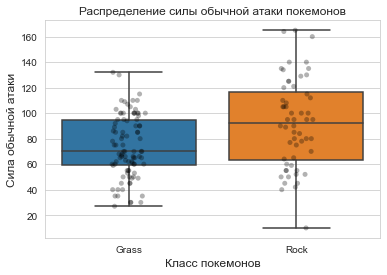

In [113]:
# объединяю серии
pokemon_01 = pd.concat([pokemon_01_a, pokemon_01_b], axis=1)
# присваиваю имена столбцам
pokemon_01.columns = ["Grass", "Rock"]
# устанавливаю фоновую сетку
sns.set_style("whitegrid")
# строю боксплот
boxplot = sns.boxplot(data=pokemon_01)
# строю диаграмму рассеивания
boxplot = sns.stripplot(data=pokemon_01, color="black", alpha=0.3)
# присваиваю имя диаграмме и осям
boxplot.axes.set_title("Распределение силы обычной атаки покемонов")
boxplot.set_xlabel("Класс покемонов", fontsize=12)
boxplot.set_ylabel("Сила обычной атаки", fontsize=12)
plt.show()

<div class="alert alert-success">
Я не могу отклонить, что покемоны в классе Rock и Grass имеют разную силу обычной атаки

<div class="alert alert-info">
    
#### Задание № 2
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [114]:
# гипотеза Н0
H0_02 = "все покемоны обладают одинаковой скоростью"
a_02 = 0.05

In [115]:
# создам выборку А из класса Water
pokemon_02_a = pokemon[
    (pokemon["Class_1"] == "Water") | (pokemon["Class_2"] == "Water")
]
pokemon_02_a = pokemon_02_a[
    ~(
        ((pokemon["Class_1"] == "Water") & (pokemon["Class_2"] == "Normal"))
        | ((pokemon["Class_2"] == "Water") & (pokemon["Class_1"] == "Normal"))
    )
]
pokemon_02_a = pokemon_02_a["Speed"]
pokemon_02_a.head()

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_19576\3449178010.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pokemon_02_a = pokemon_02_a[~(((pokemon['Class_1'] == "Water") & (pokemon['Class_2'] == "Normal")) | ((pokemon['Class_2'] == "Water") & (pokemon['Class_1'] == "Normal")))]


9     43
10    58
11    78
12    78
59    55
Name: Speed, dtype: int64

In [116]:
# создам выборку В из класса Normal
pokemon_02_b = pokemon[
    (pokemon["Class_1"] == "Normal") | (pokemon["Class_2"] == "Normal")
]
pokemon_02_b = pokemon_02_b[
    ~(
        ((pokemon["Class_1"] == "Normal") & (pokemon["Class_2"] == "Water"))
        | ((pokemon["Class_2"] == "Normal") & (pokemon["Class_1"] == "Water"))
    )
]
pokemon_02_b = pokemon_02_b["Speed"]
pokemon_02_b.head()

C:\Users\Dorzhe\AppData\Local\Temp\ipykernel_19576\3832935837.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pokemon_02_b = pokemon_02_b[~(((pokemon['Class_1'] == "Normal") & (pokemon['Class_2'] == "Water")) | ((pokemon['Class_2'] == "Normal") & (pokemon['Class_1'] == "Water")))]


20     56
21     71
22    101
23    121
24     72
Name: Speed, dtype: int64

In [117]:
pokemon_02_a.describe()

count    125.00000
mean      64.93600
std       22.74889
min       15.00000
25%       50.00000
50%       65.00000
75%       81.00000
max      122.00000
Name: Speed, dtype: float64

In [118]:
pokemon_02_b.describe()

count    101.000000
mean      72.257426
std       28.427330
min        5.000000
25%       50.000000
50%       72.000000
75%       93.000000
max      135.000000
Name: Speed, dtype: float64

In [119]:
# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_02 = stats.ttest_ind(pokemon_02_a, pokemon_02_b)
t, p_value_02

if p_value_02 >= a_02:
    print(f"Гипотеза {H0_02=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_02=} отклонена")
print(f"{p_value_02=:.3f}")

Гипотеза H0_02='все покемоны обладают одинаковой скоростью' отклонена
p_value_02=0.033


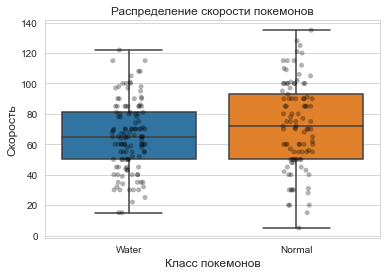

In [120]:
# объединяю серии
pokemon_02 = pd.concat([pokemon_02_a, pokemon_02_b], axis=1)
# присваиваю имена столбцам
pokemon_02.columns = ["Water", "Normal"]
# устанавливаю фоновую сетку
sns.set_style("whitegrid")
# строю боксплот
boxplot = sns.boxplot(data=pokemon_02)
# строю диаграмму рассеивания
boxplot = sns.stripplot(data=pokemon_02, color="black", alpha=0.3)
# присваиваю имя диаграмме и осям
boxplot.axes.set_title("Распределение скорости покемонов")
boxplot.set_xlabel("Класс покемонов", fontsize=12)
boxplot.set_ylabel("Скорость", fontsize=12)
plt.show()

<div class="alert alert-success">
Я не могу отклонить гипотезу, что покемоны в классе Normal и Water имеют разную  скорость

<div class="alert alert-info">
    
#### Задание № 3
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-block alert-danger">
недостаточно данных для решения

<div class="alert alert-info">
    
#### Задание № 4
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [121]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = [
    "Mega Beedrill",
    "Mega Alakazam",
    "Deoxys Normal Forme",
    "Mega Lopunny",
]

In [122]:
# гипотеза Н0
H0_04 = "сыворотка ускорения не действует"
a_04 = 0.05

In [123]:
# создам выборку А из покемонов с сывороткой
pokemon_04_a = pokemon[pokemon["Name"].isin(treathed_pokemon)]
pokemon_04_a = pokemon_04_a["Speed"]
pokemon_04_a.head()

19     145
71     150
428    150
476    135
Name: Speed, dtype: int64

In [124]:
# создам выборку В из покемонов без сывортки
pokemon_04_b = pokemon[~pokemon["Name"].isin(treathed_pokemon)]
pokemon_04_b = pokemon_04_b["Speed"]
pokemon_04_b.head()

0    45
1    60
2    80
3    80
4    65
Name: Speed, dtype: int64

In [125]:
pokemon_04_a.describe()

count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

In [126]:
pokemon_04_b.describe()

count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

In [127]:
# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_04 = stats.ttest_ind(pokemon_04_a, pokemon_04_b)
t, p_value_04

if p_value_04 >= a_04:
    print(f"Гипотеза {H0_04=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_04=} отклонена")
print(f"{p_value_04=:.10f}")

Гипотеза H0_04='сыворотка ускорения не действует' отклонена
p_value_04=0.0000000952


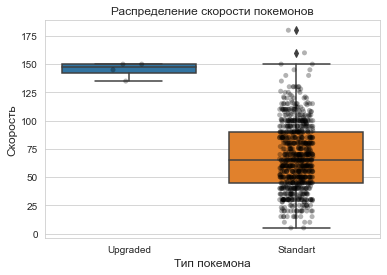

In [128]:
# объединяю серии
pokemon_04 = pd.concat([pokemon_04_a, pokemon_04_b], axis=1)
# присваиваю имена столбцам
pokemon_04.columns = ["Upgraded", "Standart"]
# устанавливаю фоновую сетку
sns.set_style("whitegrid")
# строю боксплот
boxplot = sns.boxplot(data=pokemon_04)
# строю диаграмму рассеивания
boxplot = sns.stripplot(data=pokemon_04, color="black", alpha=0.3)
# присваиваю имя диаграмме и осям
boxplot.axes.set_title("Распределение скорости покемонов")
boxplot.set_xlabel("Тип покемона", fontsize=12)
boxplot.set_ylabel("Скорость", fontsize=12)
plt.show()

<div class="alert alert-success">
Я не могу отклонить гипотезу, что сыворотка действует

<div class="alert alert-info">
    
#### Задание № 5
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [129]:
# гипотеза Н0
H0_05 = "легендарные и обычные покемоны не отличаются"
a_05 = 0.05

In [145]:
# проссумирую три показателя
pokemon["sum_leg"] = pokemon[["HP", "Attack", "Defense"]].sum(axis=1)

In [131]:
# создам выборку А из покемонов Legacy
pokemon_05_a = pokemon[pokemon["Legendary"] == True]
pokemon_05_a = pokemon_05_a["sum_leg"]
pokemon_05_a.head()

156    275
157    265
158    280
162    306
163    396
Name: sum_leg, dtype: int64

In [132]:
# создам выборку В из покемонов Normal_defense
pokemon_05_b = pokemon[pokemon["Legendary"] == False]
pokemon_05_b = pokemon_05_b["Defense"]
pokemon_05_b.head()

0     49
1     63
2     83
3    123
4     43
Name: Defense, dtype: int64

In [133]:
pokemon_05_a.describe()

count     65.000000
mean     309.076923
std       46.429822
min      230.000000
25%      275.000000
50%      305.000000
75%      340.000000
max      440.000000
Name: sum_leg, dtype: float64

In [134]:
pokemon_05_b.describe()

count    735.000000
mean      71.559184
std       30.408194
min        5.000000
25%       50.000000
50%       66.000000
75%       85.000000
max      230.000000
Name: Defense, dtype: float64

In [135]:
# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_05 = stats.ttest_ind(pokemon_05_a, pokemon_05_b)
t, p_value_05

if p_value_05 >= a_05:
    print(f"Гипотеза {H0_05=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_05=} отклонена")
print(f"{p_value_05=:.20f}")

Гипотеза H0_05='легендарные и обычные покемоны не отличаются' отклонена
p_value_05=0.00000000000000000000


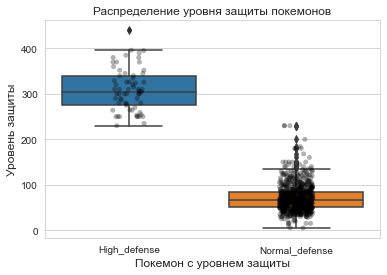

In [136]:
# объединяю серии
pokemon_05 = pd.concat([pokemon_05_a, pokemon_05_b], axis=1)
# присваиваю имена столбцам
pokemon_05.columns = ["High_defense", "Normal_defense"]
# устанавливаю фоновую сетку
sns.set_style("whitegrid")
# строю боксплот
boxplot = sns.boxplot(data=pokemon_05)
# строю диаграмму рассеивания
boxplot = sns.stripplot(data=pokemon_05, color="black", alpha=0.3)
# присваиваю имя диаграмме и осям
boxplot.axes.set_title("Распределение уровня защиты покемонов")
boxplot.set_xlabel("Покемон с уровнем защиты", fontsize=12)
boxplot.set_ylabel("Уровень защиты", fontsize=12)
plt.show()

<div class="alert alert-success">
    Я не могу отклонить гипотезу, что легендарные и обычные покемоны отличаются по характеристика HP Attack Defense

<div class="alert alert-info">
    
#### Задание № 6
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [137]:
best_defence_class = ["Rock", "Ground", "Steel", "Ice"]
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [138]:
# гипотеза Н0
H0_06 = "покемоны не отличаются по уровню защиты"
a_06 = 0.05

In [139]:
# создам выборку А из покемонов High_defense
pokemon_06_a = pokemon[
    pokemon["Class_1"].isin(best_defence_class)
    | pokemon["Class_2"].isin(best_defence_class)
]
pokemon_06_a = pokemon_06_a["Defense"]
pokemon_06_a.head()

32     85
33    110
36     87
39     77
55     25
Name: Defense, dtype: int64

In [140]:
# создам выборку В из покемонов Normal_defense
pokemon_06_b = pokemon[
    ~pokemon["Class_1"].isin(best_defence_class)
    | pokemon["Class_2"].isin(best_defence_class)
]
pokemon_06_b = pokemon_06_b["Defense"]
pokemon_06_b.head()

0     49
1     63
2     83
3    123
4     43
Name: Defense, dtype: int64

In [141]:
pokemon_06_a.describe()

count    189.000000
mean      95.666667
std       38.516092
min       15.000000
25%       70.000000
50%       90.000000
75%      115.000000
max      230.000000
Name: Defense, dtype: float64

In [142]:
pokemon_06_b.describe()

count    696.000000
mean      71.021552
std       28.957937
min        5.000000
25%       50.000000
50%       67.000000
75%       86.250000
max      230.000000
Name: Defense, dtype: float64

In [150]:
# проверю, отличаются ли два независимых образца с помощью t-критерия Стьюдента
t, p_value_06 = stats.ttest_ind(pokemon_06_a, pokemon_06_b)
t, p_value_06

if p_value_06 >= a_06:
    print(f"Гипотеза {H0_06=} не может быть отклонена")
else:
    print(f"Гипотеза {H0_06=} отклонена")
print(f"{p_value_06=:.20f}")

Гипотеза H0_06='покемоны не отличаются по уровню защиты' отклонена
p_value_06=0.00000000000000000001


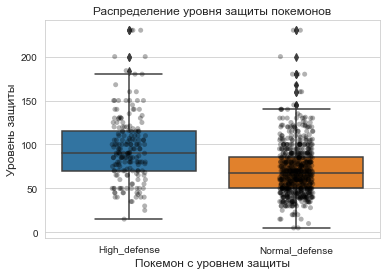

In [144]:
# объединяю серии
pokemon_06 = pd.concat([pokemon_06_a, pokemon_06_b], axis=1)
# присваиваю имена столбцам
pokemon_06.columns = ["High_defense", "Normal_defense"]
# устанавливаю фоновую сетку
sns.set_style("whitegrid")
# строю боксплот
boxplot = sns.boxplot(data=pokemon_06)
# строю диаграмму рассеивания
boxplot = sns.stripplot(data=pokemon_06, color="black", alpha=0.3)
# присваиваю имя диаграмме и осям
boxplot.axes.set_title("Распределение уровня защиты покемонов")
boxplot.set_xlabel("Покемон с уровнем защиты", fontsize=12)
boxplot.set_ylabel("Уровень защиты", fontsize=12)
plt.show()

<div class="alert alert-success">
    Я не могу отклонить гипотезу, что покемоны классов `Rock`, `Ground`, `Steel`, `Ice` имеют более высокий уровень защиты